<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow

## Introduction

The main features include: 



*   Defining, Optimizing and efficiently calculating mathematical expressions involving multi-dimentional arrays (tensors)
*   Programming support for deep NN and machine learning techniques.
* Transparent use of GPU support, TensorFlow will figure out which part of the computation should be moved to GPU.
* High Scalability of computation across machines and huge datasets.



In [0]:
import tensorflow as tf

x = tf.constant(1)
y = tf.Variable(x+3)

model = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(model)
    print(sess.run(y))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
4


In the above example, first the execution graph called Data Flow Graph is created. The values are nor computed until the session is executed. 'With' statement above creates a session and destroys it when its finished execution. This is a better way of creating and managing a session than explictly creating the session and closing it when the execution is complete. 

### Graph

A computational Graph is a series of TensorFlow operations arranged into a graph. The graph consists of two types of objects:

**Node (```tf.Operation```):** In TensorFlow, each node represents an instance of operation that consumes and produce tensors.

**Edge (```tf.Tensor```):** 
* **Normal Edges:** These represents the values that will flow through the graph

* **Special Edges:** Special edge indicates the control dependency between two nodes.

**Kernal:** This represents the concrete implementation of an operation at device level (CPU or GPU)




### TensorBoard

TensorBoard is a visualization tool to analyze Data Flow Graphs.

### Session

To eveluate tensors, instantiate a ```tf.Session``` object.

* ```session.extend:``` Used to extend the execution graph, requesting to add more operations (nodes) and edges (data)
* ```session.run:``` runs the execution graph to produce output.

In [0]:
vec = tf.random_uniform(shape=(3,))
out1 = vec + 1
out2 = vec + 2
with tf.Session() as sess:
    print(sess.run(vec))
    print(sess.run(vec))
    print(sess.run((out1, out2)))

[0.12520444 0.16810274 0.31912613]
[0.551265   0.79956293 0.02903426]
(array([1.3288718, 1.3389298, 1.725756 ], dtype=float32), array([2.3288717, 2.3389297, 2.7257562], dtype=float32))


TensorFlow also supports interactive session, so that we can avoid sess.run usage. This is useful in ipny notebooks.

In [0]:
sess = tf.InteractiveSession()

raw_data = [1., 4., 5.5, 7.]
spike = tf.Variable([False] * len(raw_data))
spike.initializer.run()

for i, r in enumerate(raw_data):
    if r > 5:
        tf.assign(spike[i], True).eval()
print("Spike", spike.eval())

sess.close()

Spike [False False  True  True]


### Feeding

Unlike above example, a graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later, like a function argument.

In [0]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = x + y
with tf.Session() as sess:
    print(sess.run(z, feed_dict={x: [1, 4], y: [2, 8]}))

[ 3. 12.]


## Tensors

A tensor (```tf.Tensor```) is a generalization of vector and matrices to potentially higher dimentions. Internally, tensors are represented as n-dimentional arrays of base datatypes. A tensor has two properties, a data type and a shape. Each element of the tensor has the same data type, and the data type is always known.


The main tensors are:
* ```tf.constant:``` Creates a constant tensor
* ```tf.placeholder:``` A placeholder allows us to create operations and build computations without needing the data
* ```tf.SparseTensor: ``` Represents a sparse tensor with indices, values and dense_shape.

With exception of ```tf.Variable```, the values of a tensor is immutable.

### Rank

The rank of a tensor object is its number of dimensions

| Rank | Math entity | Examples                                                |
|------|-------------|---------------------------------------------------------|
| 0    | Scalar      |  ```tf.Variable("abc", tf.string)``` <br>```tf.Variable(4, tf.int16)``` |
| 1    | Vector      | ```tf.Variable([12.3 - 4.8j, 7.4 - 9.1j], tf.complex64)``` |
| 2    | Matrix      | ```tf.Variable([True], [False], [True], tf.bool)```
| 3    | 3-Tensor      |
| n    | n-Tensor      |







```tf.rank``` can be used to get the rank of a tensor

### Shape

A shape of the tensor is the number of elements in each dimension. A tensor can be also be reshaped to desired shape

In [0]:
v = tf.ones(shape=(3,4,5))
print("using tf.shape :", tf.shape(v))
print("using get_shape :", v.get_shape())

v2 = tf.reshape(v, shape=(3,20))
print("Shape of v2 is", v2.get_shape())

with tf.Session() as sess:
    print("using tf.shape inside session :", sess.run(tf.shape(v)))


using tf.shape : Tensor("Shape:0", shape=(3,), dtype=int32)
using get_shape : (3, 4, 5)
Shape of v2 is (3, 20)
using tf.shape inside session : [3 4 5]


### Data types

Tensors have a data type. It is not possible to have a tensor with different datatypes, however, it is possible to serialize arbitary data structures as strings and store those in tensors.

* It is possible to case tensors from one data type to another using ```tf.cast```.

* ```Tensor.dtype``` property gives the data type of the tensor

In [0]:
i = tf.constant([1,2,3], dtype=tf.int16)
f = tf.cast(i, dtype=tf.float32)

print(i.dtype)
print(f.dtype)

<dtype: 'int16'>
<dtype: 'float32'>


### Creating Tensors

Along with above methods, Python lists, scalars, Numpy arrays can be converted to tensors using ```tf.convert_to_tensor``` function.

In [0]:
import numpy as np

n = np.array([1,4,7,2])
n_tensor = tf.convert_to_tensor(n, dtype=tf.float64)

with tf.Session() as sess:
    print(sess.run(n_tensor))
    print(sess.run(n_tensor[1]))

[1. 4. 7. 2.]
4.0


## Variables

A TensorFlow variable is the best way to represent shares, persistent state manipulated by the program.

A ```tf.Variable``` represents a tensor whose value can be changed by running operations on it. Internally, a variable stores a persistent tensor and hence it exists outside the context of a single session. Specific operations allow to read and modify the values of variables.

### Creating a Variable

A variable if created using ```tf.get_variable``` function. The default dtype is float32 and its initial value will be randomized. Different initializers can be used instead to set initial values


In [0]:
# tf.reset_default_graph()
v1 = tf.get_variable("v1", shape=[1,2,3])
v2 = tf.get_variable("v2", dtype=tf.int32, initializer=tf.constant([23,42]))
v3 = tf.get_variable("v3", shape=[1,2], dtype=tf.int32, initializer=tf.zeros_initializer)


Note: As the variables of TensorFlow are persistant, we cannot create a variable with same name again. We need to reset the graph using ```tf.reset_default_graph``` to delete the existing variables and create new.

### Variable Collections

To enable disconnected parts of a TensorFlow program to access variables easily, variables van be grouped into collections.

By default every variable created is placed in below two collections:
* ```tf.GraphKeys.GLOBAL_VARIABLES``` - variables that can be shared across multiple devices
* ```tf.GraphKeys.TRAINABLE_VARIABLES``` - variables for which TensorFlow will caucluate gradients,


We can add variables to our own collection using ```tf.add_to_collection```. No need to explictly define the name of the collection, we can directly specify a name.

*Note: ```clear_collection``` is used to remove collection from default graph. This is used here to clear collection incase if we run the below cell multiple times*

In [0]:
# tf.get_default_graph().clear_collection("my_collection")
tf.add_to_collection("my_collection", v1)
tf.get_collection("my_collection")

[<tf.Variable 'v1:0' shape=(1, 2, 3) dtype=float32_ref>]

If we dont want a variable to be placed in TRAINABLE_VARIABLES, then we can either add it to ```tf.GraphKeys.LOCAL_VARIABLES``` or specify ```trainable=False```

In [0]:
# tf.reset_default_graph()
c1 = tf.get_variable("c1", shape=(), collections=[tf.GraphKeys.LOCAL_VARIABLES])
c2 = tf.get_variable("c2", shape=(), trainable=False)

In [0]:
tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES)

[<tf.Variable 'c1:0' shape=() dtype=float32_ref>]

In [0]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=(4,) dtype=bool_ref>,
 <tf.Variable 'v1:0' shape=(1, 2, 3) dtype=float32_ref>,
 <tf.Variable 'v2:0' shape=(2,) dtype=int32_ref>,
 <tf.Variable 'v3:0' shape=(1, 2) dtype=int32_ref>,
 <tf.Variable 'c2:0' shape=() dtype=float32_ref>]

### Initializing Variables

The low-level frameworks (all the topics discussed) will not initiaize the variables before training. This is because, it allows you not to rerun potentially expensive initiaizers when reloading a model from a checkpoint. Hence you need to explictly initialize the variables. This can be done using ```tf.global_variable_initializer()``` function. The function returns a single operations which initializes all the variables in ```tf.GraphKeys.GLOBAL_VARIABLES``` collection. Running this operation will initialize all the variables 


Most high-level frameworks such as ```tf.contrib.slim, tf.estimator.Estimator``` and Keras automatically initializ variables before training a model. 

In [0]:
tf.global_variables_initializer()

<tf.Operation 'init_1' type=NoOp>

We can explictly initialize variables using ```var.initializer```

In [0]:
c1.initializer

<tf.Operation 'c1/Assign' type=Assign>

### Sharing Variables

Sharing of variables in TensorFlow is done in two ways:
* Explictly passing variable objects around
* Implictly wrapping variables within ```tf.variable_scope``` objects

For example, 

In [0]:
def sum_func():
    x = tf.get_variable("x", [2,2], initializer=tf.random_normal_initializer())
    y = tf.get_variable("y", [2,2], initializer=tf.random_normal_initializer())
    return x+y

If we want to call this function repeatedly to create namy convolution layers, the above function will fail, as the desired behaviour is unclear as in whether to create new variables or reuse the existing ones.

In [0]:
'''
Below code generates error as the function sum_func() is trying to 
create x which is already created when called for the first time to compute
res1
'''

#res1 = sum_func()
#res1 = sum_func()

'\nBelow code generates error as the function sum_func() is trying to \ncreate x which is already created when called for the first time to compute\nres1\n'

We can solve this issue by using different variable scope using ```tf.variable_scope``` function or use ```reuse=True``` with same variable scope or call ```scope.reuse_variables()``` function as below

In [0]:
#tf.reset_default_graph()
with tf.variable_scope("conv1"):
    res1 = sum_func()
with tf.variable_scope("conv2"):
    res2 = sum_func()

In [0]:
with tf.variable_scope("conv3"):
    res1 = sum_func()
with tf.variable_scope("conv3", reuse=True):
    res2 = sum_func()

In [0]:
with tf.variable_scope("conv4") as scope:
    res1 = sum_func()
    scope.reuse_variables()
    res2 = sum_func()

### Saving and Loading Variables

TensorFlow also provides the facility to save and load the variables. This can be done using ```tf.train.Saver()``` funtion



```
saver = tf.train.Saver()
//To save
save_path = saver.save(sess, "var.ckpt")
//To Restore
saver.restore(sess, "./var.ckpt")
```



## Maths computations

### Matrix Operations



In [0]:
m1 = np.array([[2,2,2], [3,3,3], [4,4,4]], dtype='int32')
m2 = np.array([[1,2,3], [1,2,3], [1,2,3]])
m3 = np.array([(2,7,2),(1,4,2),(9,0,2)], dtype='float32')

print("m1 = ")
print(m1)
print("m2 = ")
print(m2)
print("m3 = ")
print(m3)

mt1 = tf.constant(m1)
mt2 = tf.constant(m2, dtype=tf.int32)

m_prod = tf.matmul(mt1, mt2)
m_det = tf.matrix_determinant(m3)

with tf.Session() as sess:
    r_prod = sess.run(m_prod)
    r_sum = sess.run(tf.add(m1, m2))
    r_det = sess.run(m_det)

print("m1*m2 = ")
print(r_prod)
print("m1+m2 = ")
print(r_sum)
print("m3 determinant = ")
print(r_det)

m1 = 
[[2 2 2]
 [3 3 3]
 [4 4 4]]
m2 = 
[[1 2 3]
 [1 2 3]
 [1 2 3]]
m3 = 
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
m1*m2 = 
[[ 6 12 18]
 [ 9 18 27]
 [12 24 36]]
m1+m2 = 
[[3 4 5]
 [4 5 6]
 [5 6 7]]
m3 determinant = 
55.999992


Note: For ```tf.matrix_determinant``` the tensor datatype should be atleast float

In [0]:
!wget "https://images-assets.nasa.gov/image/PIA04591/PIA04591~orig.jpg"


--2019-01-20 22:38:14--  https://images-assets.nasa.gov/image/PIA04591/PIA04591~orig.jpg
Resolving images-assets.nasa.gov (images-assets.nasa.gov)... 13.33.57.46, 13.33.57.69, 13.33.57.113, ...
Connecting to images-assets.nasa.gov (images-assets.nasa.gov)|13.33.57.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38159 (37K) [image/jpeg]
Saving to: ‘PIA04591~orig.jpg.2’

PIA04591~orig.jpg.2 100%[===================>]  37.26K  --.-KB/s    in 0.02s   

2019-01-20 22:38:14 (1.93 MB/s) - ‘PIA04591~orig.jpg.2’ saved [38159/38159]



In [0]:
import matplotlib.image as mp_image

file = "PIA04591~orig.jpg"
image = mp_image.imread(file)
print("Image dim : {}".format(image.ndim))
print("Image shape : {}".format(image.shape))

Image dim : 3
Image shape : (810, 540, 3)


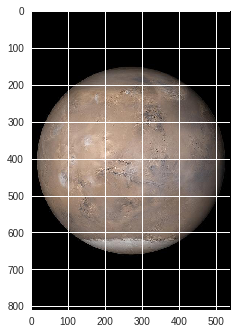

In [0]:
import matplotlib.pyplot as plt

plt.imshow(image);

In [0]:
tf_image = tf.placeholder("uint8", [None, None, 3])
slice_image = tf.slice(tf_image, [300,0,0], [40, -1, -1])
with tf.Session() as sess:
    slice_image_out = sess.run(slice_image, feed_dict={tf_image: image})
    print(slice_image_out.shape)

(40, 540, 3)


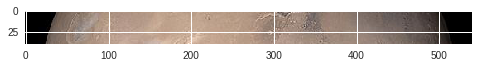

In [0]:
plt.imshow(slice_image_out)

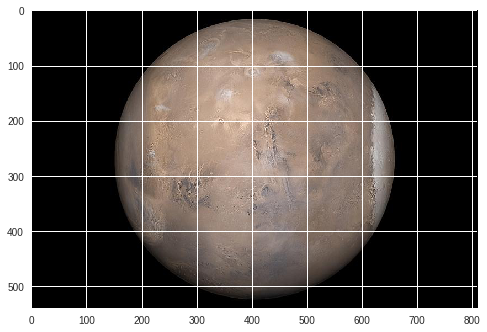

In [0]:
rotate_image = tf.transpose(tf_image, perm=[1,0,2])
with tf.Session() as sess:
    rotate_image_out = sess.run(rotate_image, feed_dict={tf_image: image})

plt.imshow(rotate_image_out);

### Compute Gradients

Derivatives of functions can be easily calculated using TensorFlow using ```tf.gradients``` funtion.

For example we will compute the gradient of $f = 2x^2$ with respect x=1

In [0]:
x = tf.placeholder(dtype=tf.float32)
f = 2*x**2
grad = tf.gradients(f, x)

with tf.Session() as sess:
    grad_out = sess.run(grad, feed_dict={x: 1})

print(grad_out)

[4.0]


### Random Numbers

TensorFlow provides operators to create random tensors with different distributions

* ```tf.random_uniform``` for uniform distribution 
* ```tf.random_normal``` for normal distribution


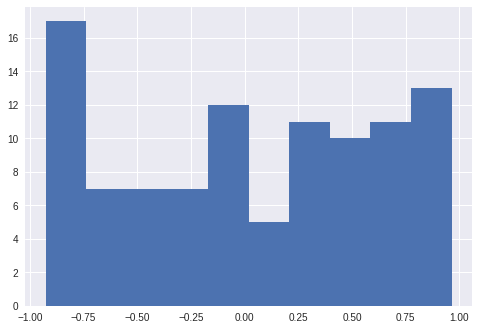

In [0]:
u_random = tf.random_uniform([100], minval=-1, maxval=1, dtype=tf.float32)
n_random = tf.random_normal([100], mean=0, stddev=2, seed=5)

with tf.Session() as sess:
    uniform = sess.run(u_random)

plt.hist(uniform);

Above code can also be written as below

Note: density=True will normalise the data to form a probability density function i.e. Area under hist = 1

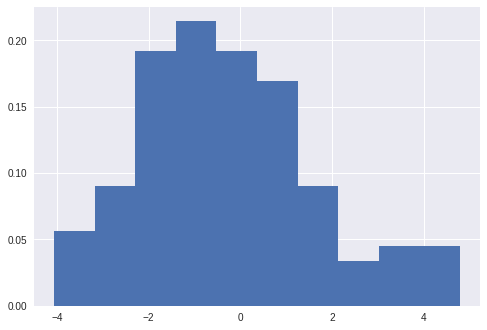

In [0]:
with tf.Session() as sess:
    plt.hist(n_random.eval(), density=True)

Some specific examples of commonly used operators include:
* ```tf.add(x, y):```  Add two tensors of the same type, x + y
* ```tf.subtract(x, y):```  Subtract tensors of the same type, x - y
* ```tf.multiply(x, y):``` Multiply two tensors element-wise
* ```tf.pow(x, y):``` Take the element-wise power of x to y
* ```tf.exp(x):``` Equivalent to pow(e, x) , where e is Euler’s number (2.718...)
* ```tf.sqrt(x):``` Equivalent to pow(x, 0.5)
* ```tf.div(x, y):``` Take the element-wise division of x and y
* ```tf.truediv(x, y):```  Same as tf.div , except casts the arguments as a float
* ```tf.floordiv(x, y):``` Same as truediv , except rounds down the final answer into an integer
* ```tf.mod(x, y):``` Takes the element-wise remainder from division

Full documentation: https://www.tensorflow.org/api_docs/python/tf/math


## Machine Learning - Linear Regression

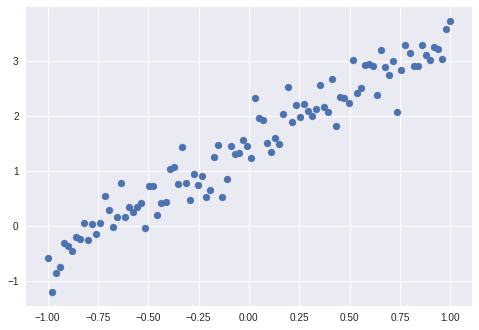

In [0]:
x_train = np.linspace(-1, 1, 100)
y_train = 1.43 + 2 * x_train + np.random.randn(x_train.shape[0]) * 0.33
plt.scatter(x_train, y_train)
plt.show()

Tensor("Cast_4:0", shape=(?,), dtype=float32)


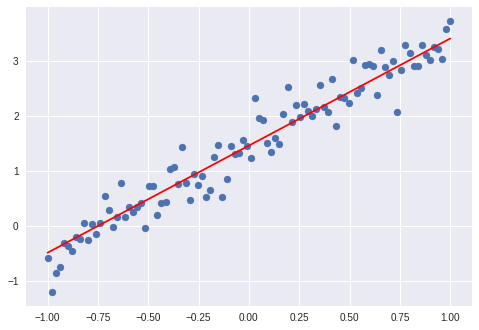

In [0]:
def model(X, w, b):
    return tf.add(b, tf.multiply(X, w))

def predict(X, w, b):
    return X * w + b

#Initialise weights
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(0.0, name="weights", dtype=tf.float32)
b = tf.Variable(0.0, name="bias", dtype=tf.float32)
m = tf.cast(tf.shape(X), dtype=tf.float32)
learning_rate = 0.01
training_epochs = 500

#Call model
y_model = model(X, w, b)

#Compute cost
cost = tf.div(tf.math.reduce_sum(tf.square(y-y_model)), m)

#train the model
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(train, feed_dict={X: x_train, y: y_train})
    w_opt = sess.run(w)
    b_opt = sess.run(b)

plt.scatter(x_train, y_train)
y_learned = predict(x_train, w_opt, b_opt)
plt.plot(x_train, y_learned, 'r')
plt.show()

## Machine Learning - KNN

In [0]:
import input_data

mnist_images = input_data.read_data_sets("MNIST_data", one_hot=False)
train.next_batch(10)
pixels, real_values = mnist_images.train.next_batch(10)
print(real_values)

AttributeError: ignored